<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset (update file name if needed)
from google.colab import files
uploaded = files.upload()   # Upload CSV from local machine

Saving DMV_Written_Tests.csv to DMV_Written_Tests (1).csv


In [ ]:
# Assuming the uploaded file is named 'your_dataset.csv'
data = pd.read_csv("DMV_Written_Tests.csv")

# Display first 5 rows
print("First 5 rows of dataset:")
display(data.head())

# Basic info
print("\nDataset Info:")
print(data.info())

print("\nMissing values per column:")
print(data.isnull().sum())

First 5 rows of dataset:


,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DMV_Test_1  100 non-null    float64
 1   DMV_Test_2  100 non-null    float64
 2   Results     100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB
None

Missing values per column:
DMV_Test_1    0
DMV_Test_2    0
Results       0
dtype: int64


### Task 3: Visualize the Data
---

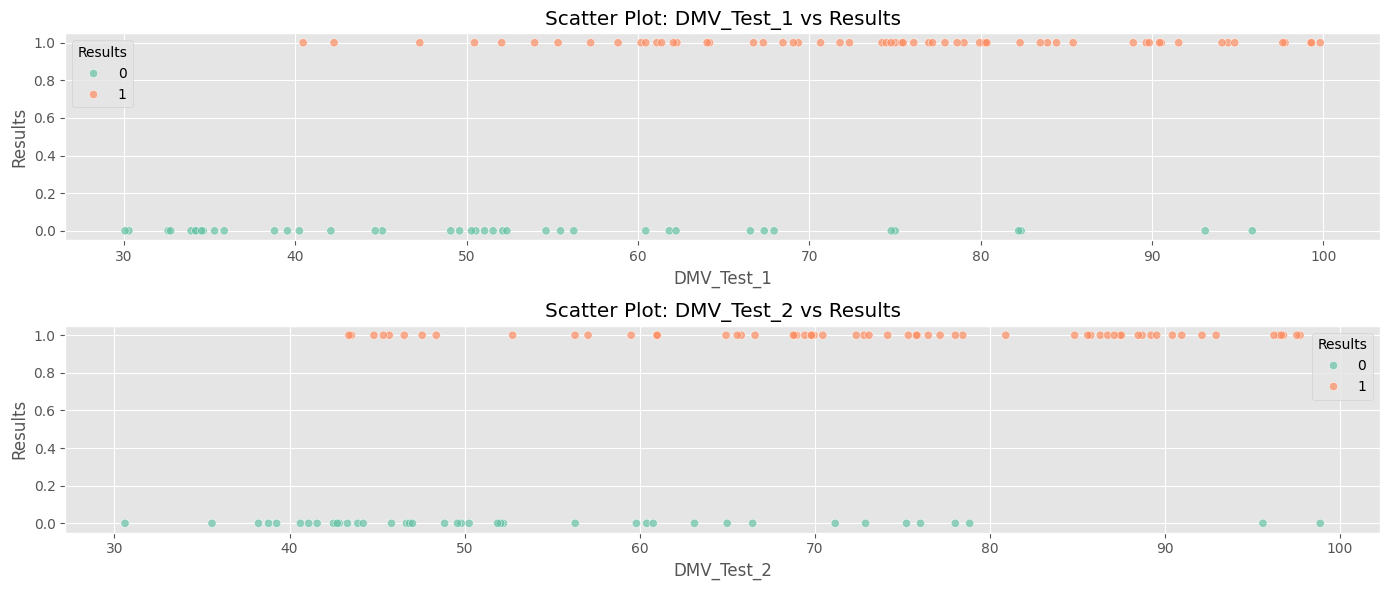

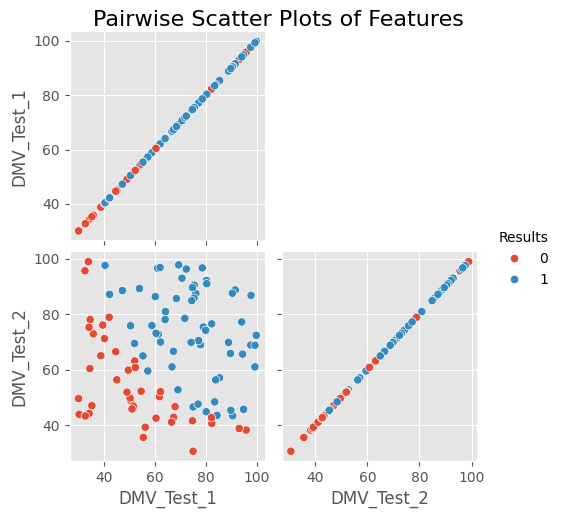

In [ ]:
# ===== Scatter Plots for Feature Relationships =====
import matplotlib.pyplot as plt
import seaborn as sns

target_col = "Results"   # 👈 update to your actual target column

feature_cols = [c for c in data.columns if c != target_col]

# 1. Scatter plot each feature vs target
plt.figure(figsize=(14, len(feature_cols)*3))

for idx, feat in enumerate(feature_cols, 1):
    plt.subplot(len(feature_cols), 1, idx)
    sns.scatterplot(x=data[feat], y=data[target_col], hue=data[target_col], palette="Set2", alpha=0.7)
    plt.title(f"Scatter Plot: {feat} vs {target_col}")
    plt.xlabel(feat)
    plt.ylabel(target_col)

plt.tight_layout()
plt.show()

# 2. Pairwise scatter plots of features, colored by target
sns.pairplot(data[feature_cols + [target_col]], hue=target_col, diag_kind=None, corner=True)
plt.suptitle("Pairwise Scatter Plots of Features", y=1.02, fontsize=16)
plt.show()

### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

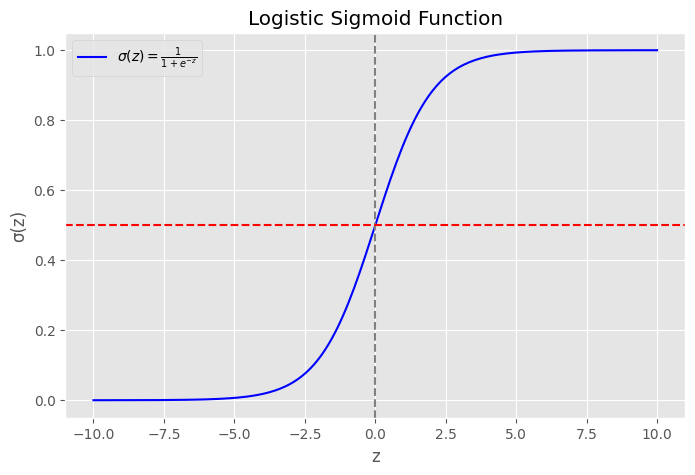

In [ ]:
# Logistic sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Test the function with a few values
z_values = np.linspace(-10, 10, 200)
sigmoid_values = sigmoid(z_values)

# Plot sigmoid curve
plt.figure(figsize=(8,5))
plt.plot(z_values, sigmoid_values, label=r'$\sigma(z) = \frac{1}{1+e^{-z}}$', color='blue')
plt.axvline(0, color='gray', linestyle='--')
plt.axhline(0.5, color='red', linestyle='--')
plt.title("Logistic Sigmoid Function")
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.legend()
plt.grid(True)
plt.show()

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [ ]:
def add_bias(X):
    """Prepend a column of ones to X for the bias/intercept term."""
    return np.c_[np.ones((X.shape[0], 1)), X]

def cost_and_grad(theta, X, y, reg=0.0, eps=1e-12):
    """
    Compute logistic regression cost J(theta) and gradient.

    Parameters
    ----------
    theta : (d+1,) array
        Parameter vector including bias/intercept as theta[0].
    X : (m, d) array
        Feature matrix WITHOUT bias column.
    y : (m,) array in {0,1}
        Binary targets.
    reg : float
        L2 regularization strength (lambda). Default 0 (no regularization).
    eps : float
        Small constant for numerical stability in logs.

    Returns
    -------
    J : float
        Scalar cost.
    grad : (d+1,) array
        Gradient w.r.t. theta (including bias term).
    """
    m = X.shape[0]
    Xb = add_bias(X)                 # (m, d+1)
    z = Xb @ theta                   # (m,)
    p = sigmoid(z)                   # (m,)

    # Numerically stable BCE loss
    p = np.clip(p, eps, 1 - eps)
    bce = -(y * np.log(p) + (1 - y) * np.log(1 - p)).mean()

    # L2 regularization (exclude bias term theta[0])
    reg_term = (reg / (2.0 * m)) * np.sum(theta[1:] ** 2)
    J = bce + reg_term

    # Gradient
    error = (p - y)                  # (m,)
    grad = (Xb.T @ error) / m        # (d+1,)

    # Regularize all but bias
    grad[1:] += (reg / m) * theta[1:]

    return J, grad

# ---- Quick sanity check (you can delete this block later) ----
# Dummy data: 5 samples, 3 features
np.random.seed(0)
X_demo = np.random.randn(5, 3)
y_demo = (np.random.rand(5) > 0.5).astype(float)
theta_demo = np.zeros(X_demo.shape[1] + 1)

J_demo, grad_demo = cost_and_grad(theta_demo, X_demo, y_demo, reg=0.0)
print("Cost (unregularized) :", J_demo)
print("Grad shape:", grad_demo.shape)
print("Grad (first 5):", grad_demo[:5])

Cost (unregularized) : 0.6931471805599453
Grad shape: (4,)
Grad (first 5): [-0.1        -0.27044179 -0.2441441  -0.11150892]


### Task 6: Cost and Gradient at Initialization
---

In [ ]:
target_col = "Results"        # <-- updated
reg = 0.0
standardize_features = True

def standardize(X, mean=None, std=None, eps=1e-8):
    if mean is None: mean = X.mean(axis=0, keepdims=True)
    if std  is None: std  = X.std(axis=0, keepdims=True)
    return (X - mean) / (std + eps), mean, std

# --- prepare X, y ---
assert 'data' in globals(), "Dataset `data` not found. Make sure Task 2 loaded it."
assert target_col in data.columns, f"target_col '{target_col}' not in data columns. Found: {list(data.columns)}"

feature_cols = [c for c in data.columns if c != target_col]
X = data[feature_cols].to_numpy(dtype=float)
y = data[target_col].to_numpy()

# ensure binary 0/1
unique_vals = np.unique(y)
if set(unique_vals) - {0,1}:
    if len(unique_vals) != 2:
        raise ValueError(f"Non-binary target detected: {unique_vals}. Provide a binary target.")
    vals, counts = np.unique(y, return_counts=True)
    order = np.argsort(-counts)
    mapping = {vals[order[0]]: 0, vals[order[1]]: 1}
    y = np.vectorize(mapping.get)(y)
y = y.astype(int)

# optional standardization
if standardize_features:
    X, _, _ = standardize(X)

# θ=0 init
theta0 = np.zeros(X.shape[1] + 1)

# compute cost & gradient
J0, grad0 = cost_and_grad(theta0, X, y, reg=reg)

print(f"Cost at initialization (unregularized): {J0:.12f}")
print(f"Gradient shape: {grad0.shape}")

param_names = ["bias"] + feature_cols
grad_table = pd.DataFrame({"parameter": param_names, "gradient": grad0})
print("\nGradients at initialization:")
display(grad_table)


Cost at initialization (unregularized): 0.693147180560
Gradient shape: (3,)

Gradients at initialization:


,parameter,gradient
0,bias,-0.100000
1,DMV_Test_1,-0.281229
2,DMV_Test_2,-0.250986


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

epoch    0 | cost 0.693147
epoch  200 | cost 0.269168
epoch  400 | cost 0.237628
epoch  600 | cost 0.225540
epoch  800 | cost 0.219299
epoch 1000 | cost 0.215611
epoch 1200 | cost 0.213255
epoch 1400 | cost 0.211671
epoch 1600 | cost 0.210568
epoch 1800 | cost 0.209779
epoch 1999 | cost 0.209205

Final θ shape: (3,)
Train Accuracy: 0.8875
Test  Accuracy: 0.9500


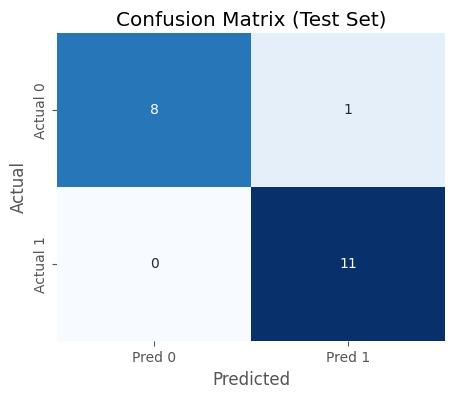

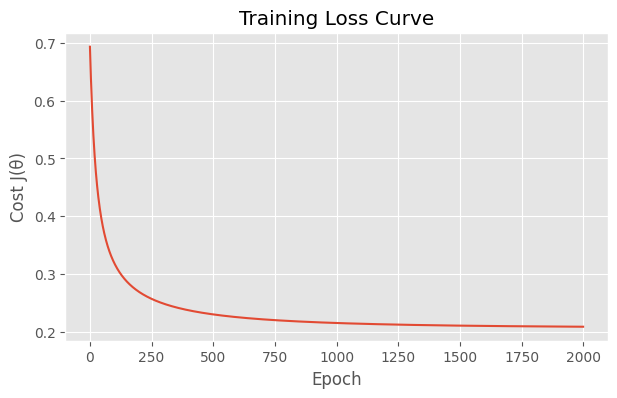

In [ ]:
# ===== Task 7: Gradient Descent with Train/Test Split & Confusion Matrix =====

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ---- hyperparameters ----
lr     = 0.1
epochs = 2000
tol    = 1e-6

# ---- prepare X, y ----
feature_cols = [c for c in data.columns if c != "Results"]
X = data[feature_cols].to_numpy(dtype=float)
y = data["Results"].to_numpy().astype(int)

# train/test split (reuse helper if already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, seed=42)

# standardize
X_train, mean_, std_ = standardize(X_train)
X_test, _, _ = standardize(X_test, mean_, std_)

# ---- initialize ----
theta = np.zeros(X_train.shape[1] + 1)
history_loss = []
prev_J = None

# ---- gradient descent loop ----
for ep in range(epochs):
    J, grad = cost_and_grad(theta, X_train, y_train)
    theta -= lr * grad
    history_loss.append(J)

    if prev_J is not None and abs(prev_J - J) < tol:
        print(f"Converged at epoch {ep}, cost={J:.6f}")
        break
    prev_J = J

    if ep % 200 == 0 or ep == epochs - 1:
        print(f"epoch {ep:4d} | cost {J:.6f}")

# ---- evaluation ----
yhat_train = predict(theta, X_train)
yhat_test  = predict(theta, X_test)

print("\nFinal θ shape:", theta.shape)
print(f"Train Accuracy: {accuracy(y_train, yhat_train):.4f}")
print(f"Test  Accuracy: {accuracy(y_test, yhat_test):.4f}")

# ---- confusion matrix as image ----
cm = confusion_matrix(y_test, yhat_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Pred 0","Pred 1"],
            yticklabels=["Actual 0","Actual 1"])
plt.title("Confusion Matrix (Test Set)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# ---- loss curve ----
plt.figure(figsize=(7,4))
plt.plot(history_loss)
plt.xlabel("Epoch")
plt.ylabel("Cost J(θ)")
plt.title("Training Loss Curve")
plt.grid(True)
plt.show()

### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

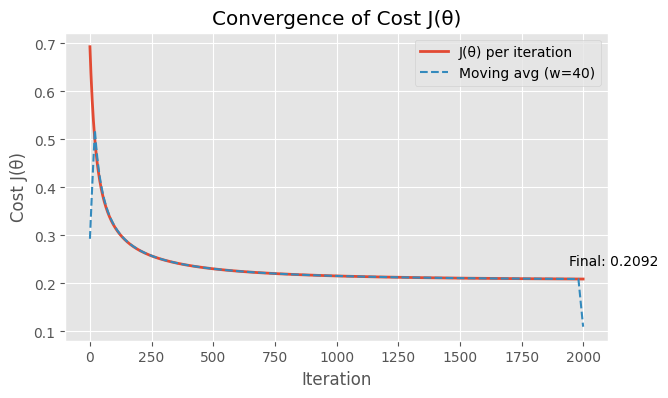

In [ ]:
iters = np.arange(len(history_loss))
J = np.array(history_loss, dtype=float)

plt.figure(figsize=(7,4))
plt.plot(iters, J, linewidth=2, label="J(θ) per iteration")
plt.xlabel("Iteration")
plt.ylabel("Cost J(θ)")
plt.title("Convergence of Cost J(θ)")
plt.grid(True)

# Optional: smoothed (moving-average) curve for readability
window = max(1, len(J)//50)   # ~2% of length; adjust if you want
if window > 1:
    kernel = np.ones(window) / window
    J_smooth = np.convolve(J, kernel, mode="same")
    plt.plot(iters, J_smooth, linestyle="--", label=f"Moving avg (w={window})")

# Annotate final value
plt.annotate(f'Final: {J[-1]:.4f}', xy=(iters[-1], J[-1]),
             xytext=(-10, 10), textcoords='offset points')

plt.legend()
plt.show()


### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

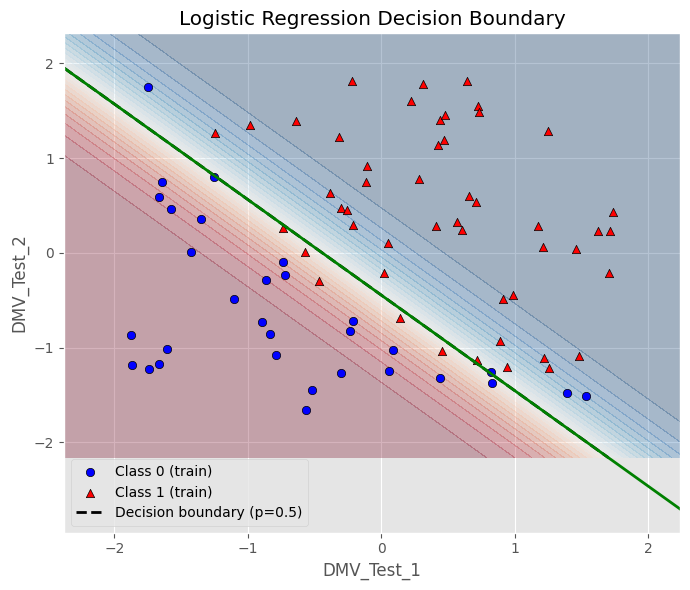

In [ ]:
# ===== Task 9: Plot the Decision Boundary (robust legend) =====
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# --- CONFIG ---
feature_cols = [c for c in data.columns if c != "Results"]
feature_pair = (feature_cols[0], feature_cols[1])   # pick any two features

# --- indices ---
i = feature_cols.index(feature_pair[0])
j = feature_cols.index(feature_pair[1])

# checks (requires Task 7 vars)
assert 'theta' in globals() and 'X_train' in globals() and 'y_train' in globals(), \
    "Run Task 7 first to create theta, X_train, y_train."

Xi, Xj = X_train[:, i], X_train[:, j]

# grid
pad = 0.5
xi_min, xi_max = Xi.min() - pad, Xi.max() + pad
xj_min, xj_max = Xj.min() - pad, Xj.max() + pad
xx, yy = np.meshgrid(
    np.linspace(xi_min, xi_max, 300),
    np.linspace(xj_min, xj_max, 300)
)

# full feature grid (others fixed at 0 in standardized space)
m_grid, d = xx.size, X_train.shape[1]
grid_full = np.zeros((m_grid, d))
grid_full[:, i] = xx.ravel()
grid_full[:, j] = yy.ravel()

# predict probabilities
probs = sigmoid(add_bias(grid_full) @ theta).reshape(xx.shape)

# --- plot ---
plt.figure(figsize=(7,6))

# probability background
plt.contourf(xx, yy, probs, levels=30, alpha=0.3, cmap="RdBu")

# decision boundary (p=0.5)
plt.contour(xx, yy, probs, levels=[0.5], linewidths=2, linestyles='--', colors="black")

# training points
plt.scatter(Xi[y_train==0], Xj[y_train==0], c="blue", marker="o", edgecolor="k", label="Class 0 (train)")
plt.scatter(Xi[y_train==1], Xj[y_train==1], c="red",  marker="^", edgecolor="k", label="Class 1 (train)")

# analytic straight line (if exactly 2 features in the model)
if d == 2 and abs(theta[j+1]) > 1e-12:
    xs = np.linspace(xi_min, xi_max, 200)
    line = (-(theta[0] + theta[i+1]*xs)) / theta[j+1]
    plt.plot(xs, line, "g-", linewidth=2)

# legend (use proxy handle for the boundary)
handles, labels = plt.gca().get_legend_handles_labels()
boundary_proxy = Line2D([0], [0], linestyle='--', linewidth=2, color='black')
handles.append(boundary_proxy)
labels.append("Decision boundary (p=0.5)")
plt.legend(handles, labels, loc="best")

plt.xlabel(feature_pair[0])
plt.ylabel(feature_pair[1])
plt.title("Logistic Regression Decision Boundary")
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [ ]:
# ===== Task 10: Predictions using optimized θ =====

# sanity check: ensure theta exists
assert 'theta' in globals(), "No optimized θ found. Run Task 7 first."

# predict probabilities (hθ(x) = σ(θ^T x))
yhat_train_proba = predict_proba(theta, X_train)
yhat_test_proba  = predict_proba(theta, X_test)

# predict classes (threshold = 0.5)
yhat_train = predict(theta, X_train)
yhat_test  = predict(theta, X_test)

print("First 10 predicted probabilities (test set):")
print(yhat_test_proba[:10])

print("\nFirst 10 predicted classes (test set):")
print(yhat_test[:10])

print("\nFirst 10 actual classes (test set):")
print(y_test[:10])

# overall accuracies
print(f"\nTrain Accuracy: {accuracy(y_train, yhat_train):.4f}")
print(f"Test  Accuracy: {accuracy(y_test, yhat_test):.4f}")


First 10 predicted probabilities (test set):
[0.99997942 0.99891646 0.99987449 0.02656762 0.99755782 0.00949865
 0.01168827 0.52137055 0.04574171 0.11479744]

First 10 predicted classes (test set):
[1 1 1 0 1 0 0 1 0 0]

First 10 actual classes (test set):
[1 1 1 0 1 0 0 1 0 0]

Train Accuracy: 0.8875
Test  Accuracy: 0.9500
